## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime
import glob
import gsw
import cmocean

%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as m:
    tmask=m.variables['tmask'][0,:,:,:]

In [3]:
fHC=nc.Dataset('/results/SalishSea/spinup.201905/01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc')
fHC2=nc.Dataset('/data/sallen/results/MEOPAR/01jan15_SMELT/SalishSea_1h_20150101_20150105_ptrc_T_20150101-20150101.nc')
fL=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/LinbfSiDiatRefl0_2/SalishSea_1h_20150101_20150219_ptrc_T_20150101-20150110.nc')
fL2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/Linbf_dian/SalishSea_1h_20150101_20150219_ptrc_T_20150101-20150101.nc')
fL3=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/Linbf_SSC/SalishSea_1h_20150101_20150219_ptrc_T_20150101-20150101.nc')

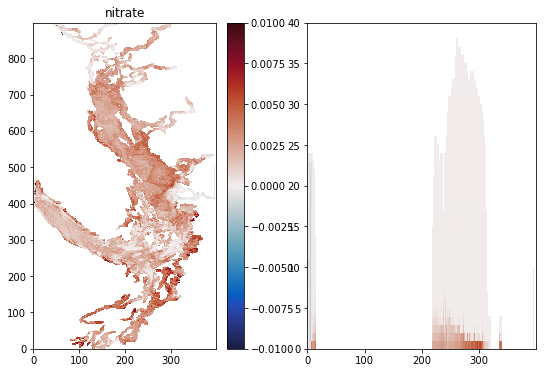

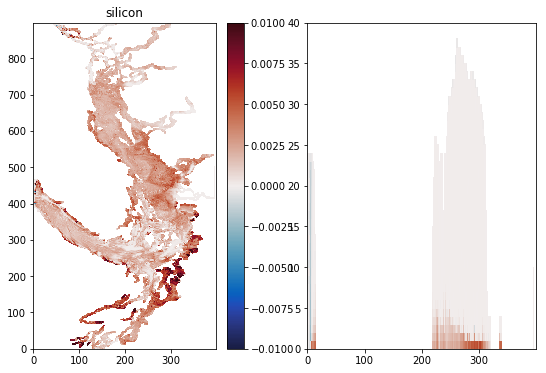

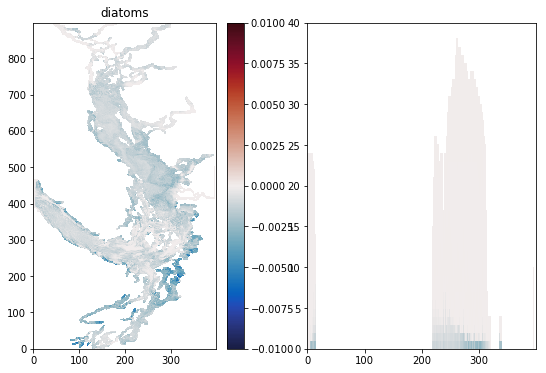

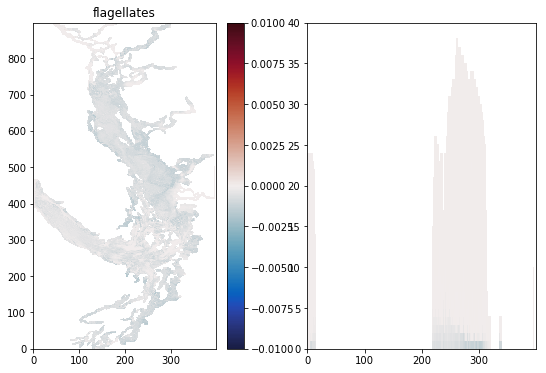

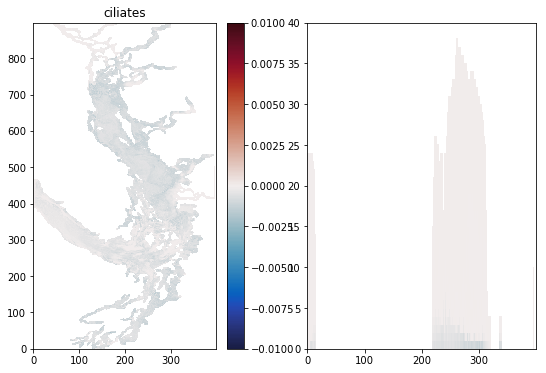

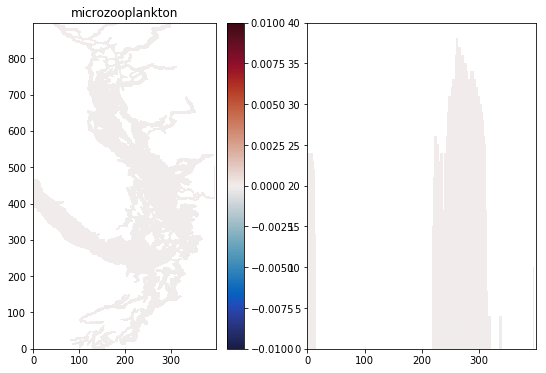

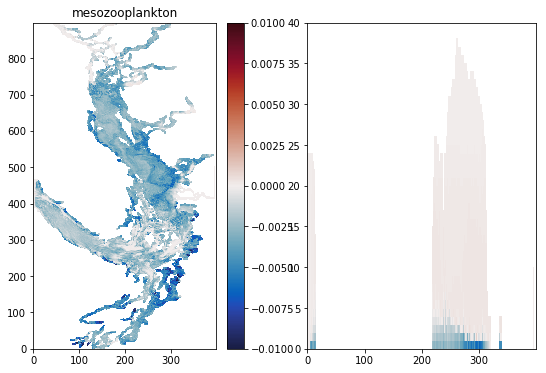

In [4]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHC.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)

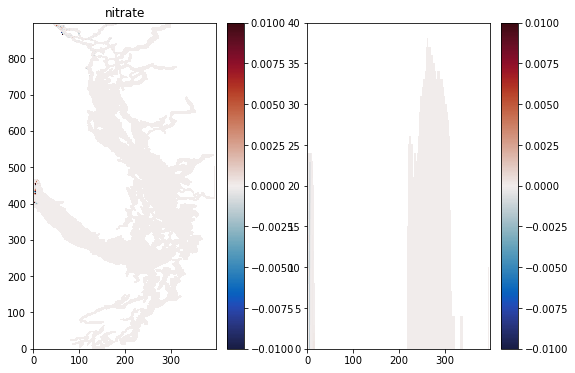

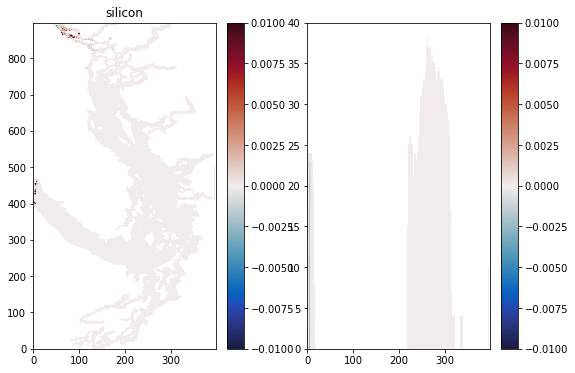

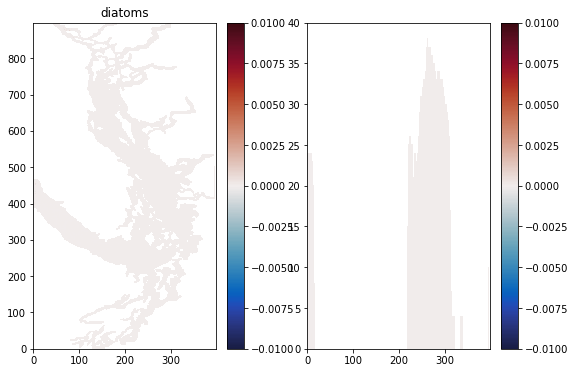

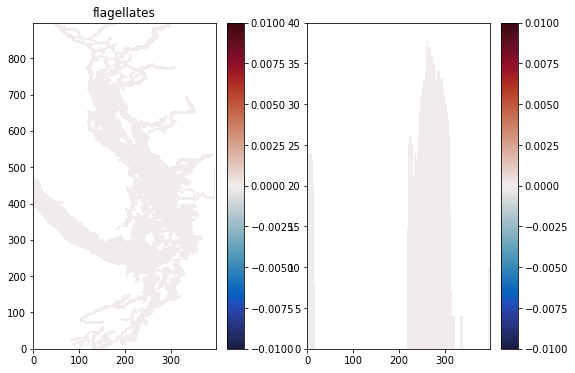

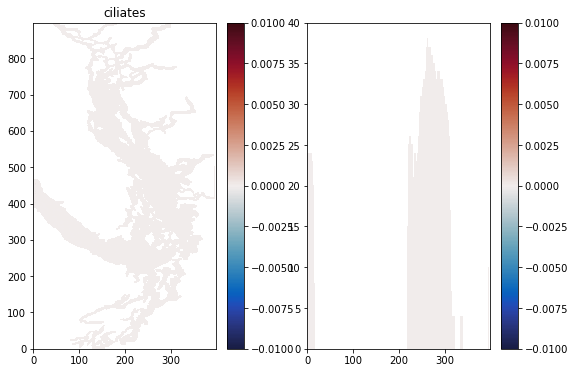

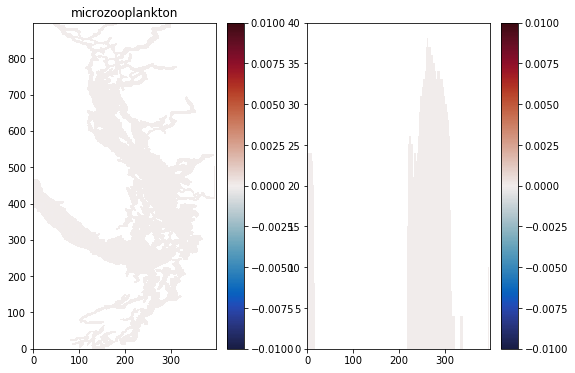

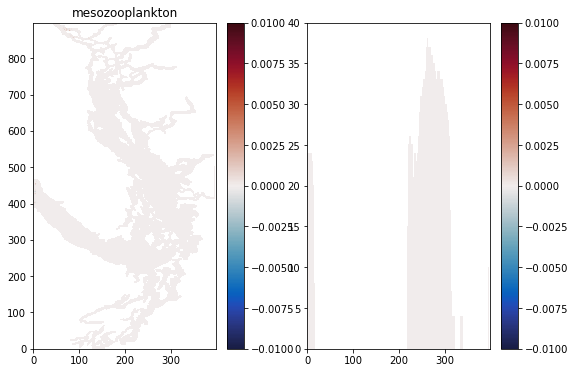

In [5]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC2.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    m1=ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHC2.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),
                        cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m1,ax=ax[1])

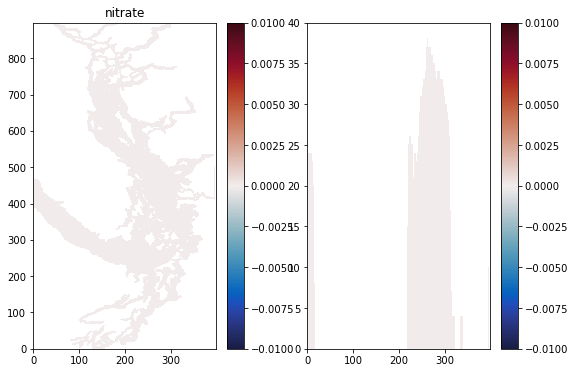

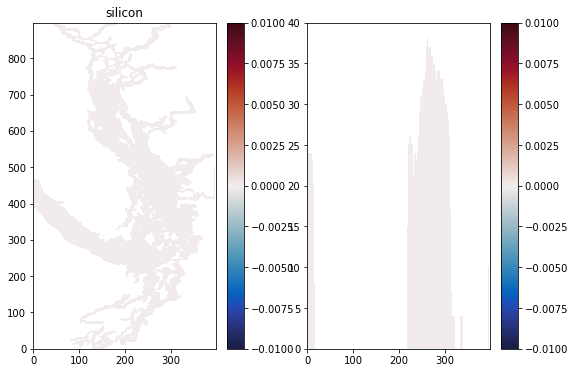

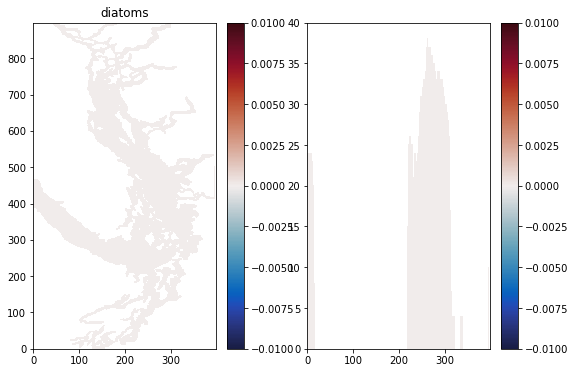

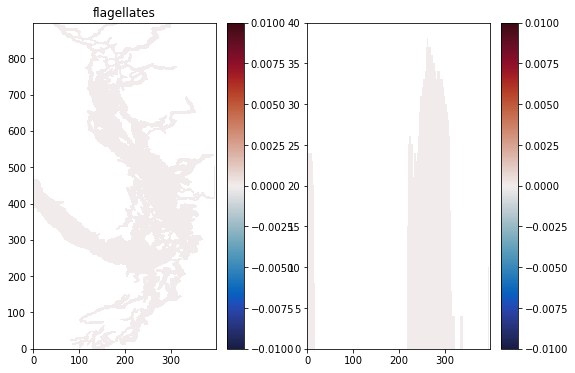

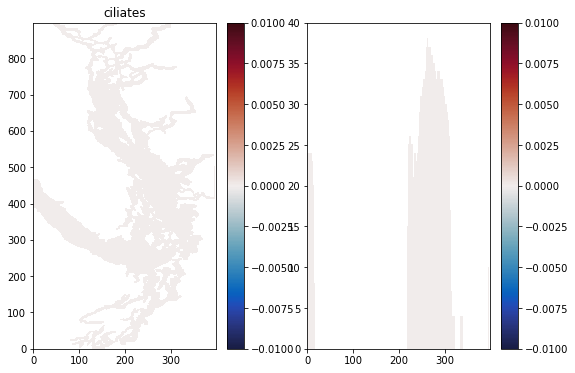

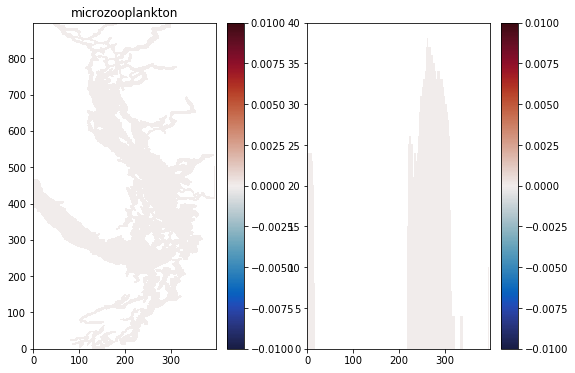

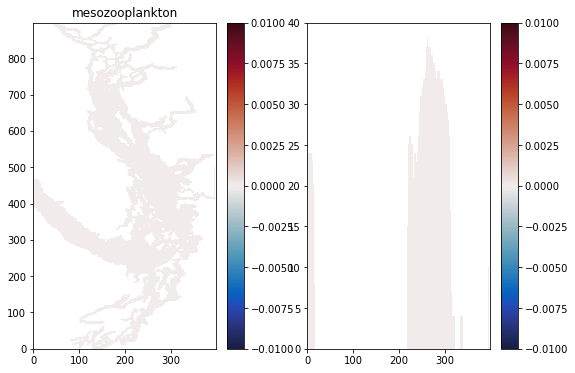

In [6]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fL2.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    m1=ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fL2.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),
                        cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m1,ax=ax[1])

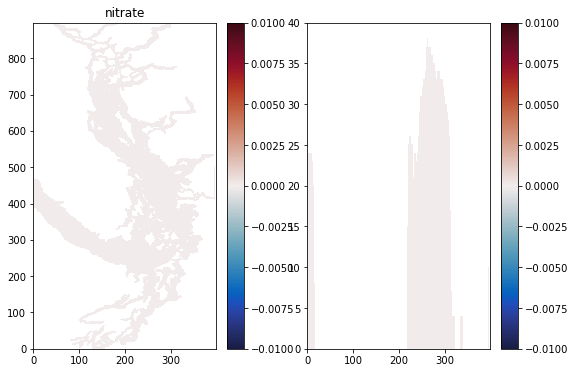

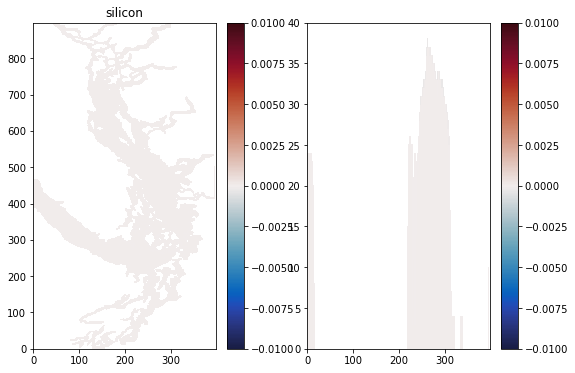

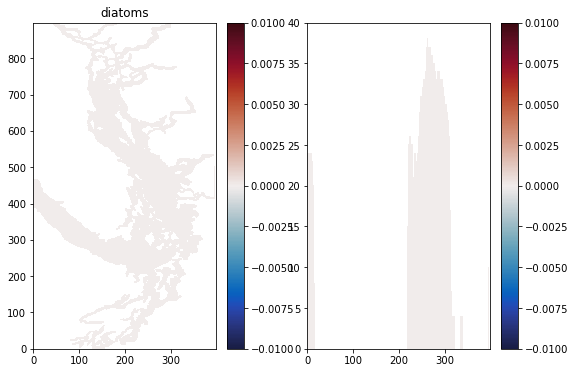

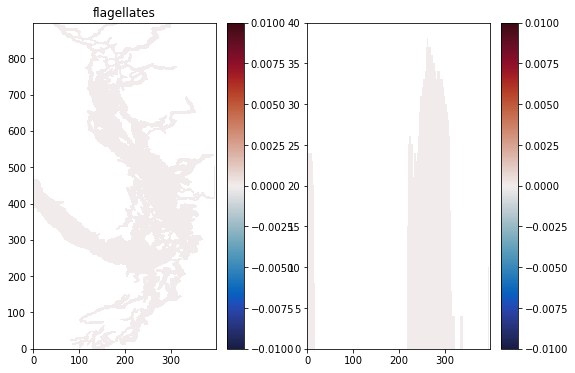

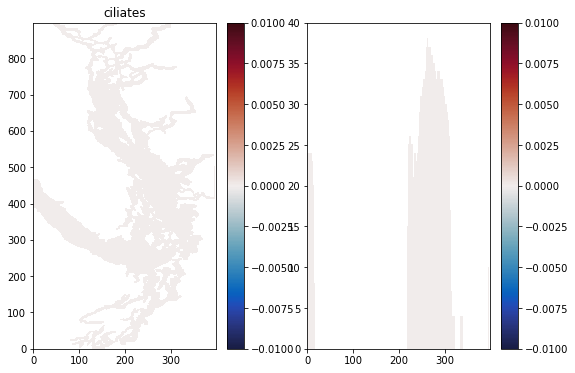

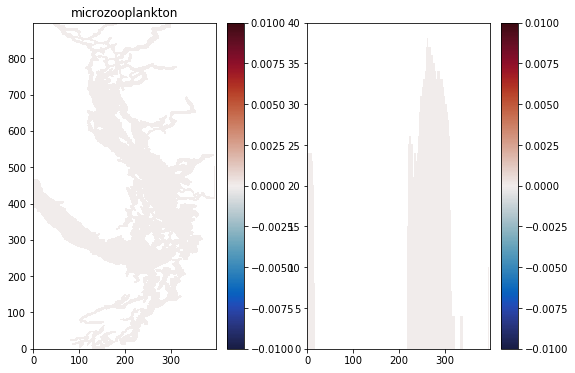

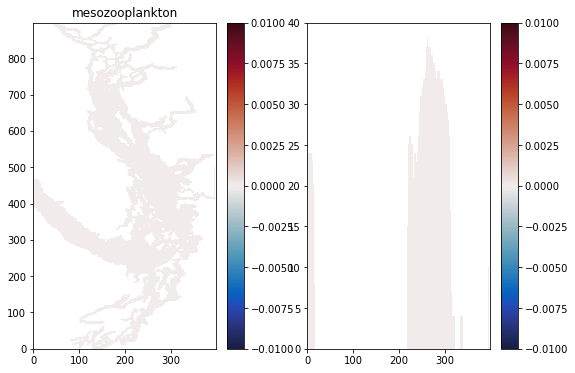

In [7]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fL3.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    m1=ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fL3.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),
                        cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m1,ax=ax[1])

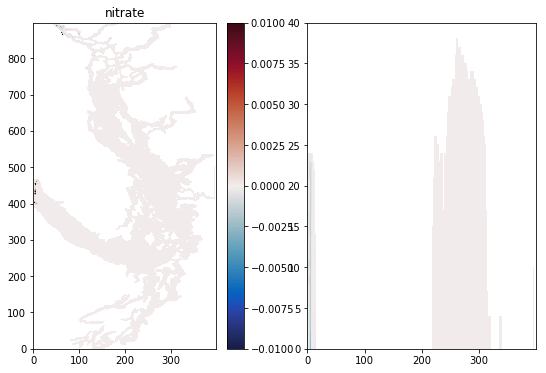

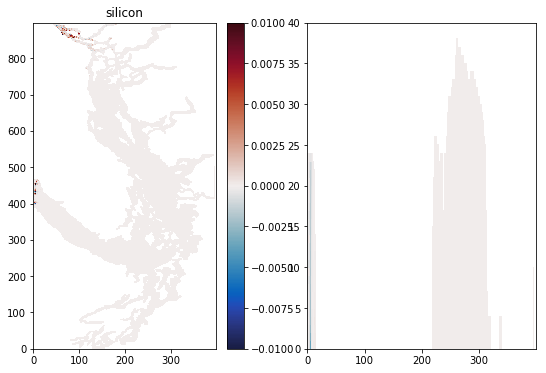

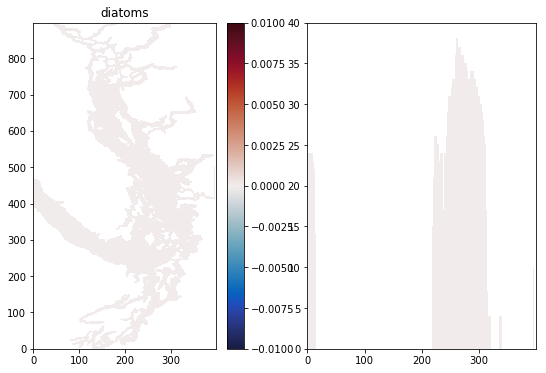

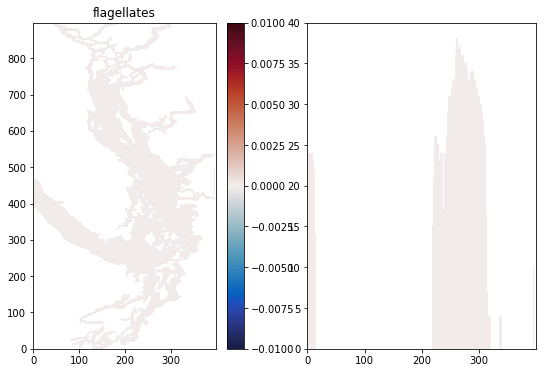

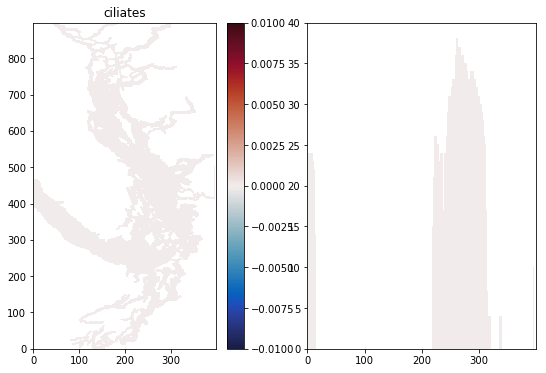

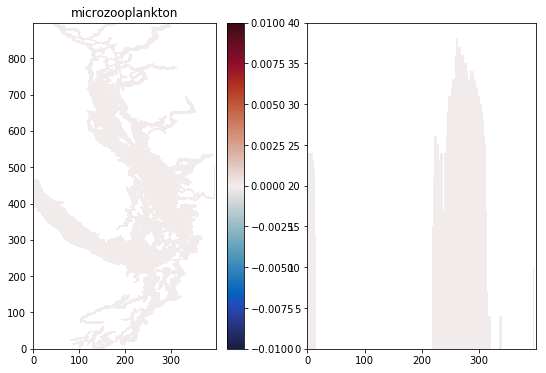

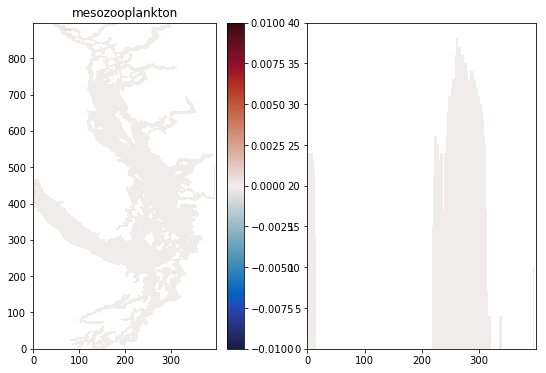

In [8]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(1,2,figsize=(9,6))
    m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC2.variables[var][0,0,:,:]-fL.variables[var][0,0,:,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)
    fig.colorbar(m,ax=ax[0])
    ax[0].set_title(var)
    ax[1].pcolormesh(np.ma.masked_where(tmask[:,450,:]==0,fHC2.variables[var][0,:,450,:]-fL.variables[var][0,:,450,:]),cmap=cmocean.cm.balance,vmin=-.01,vmax=.01)

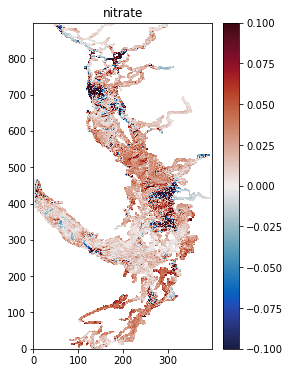

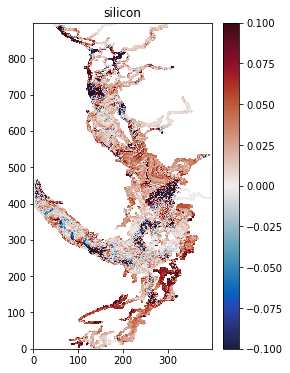

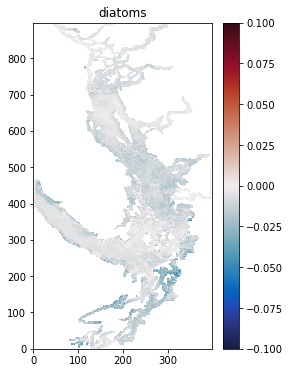

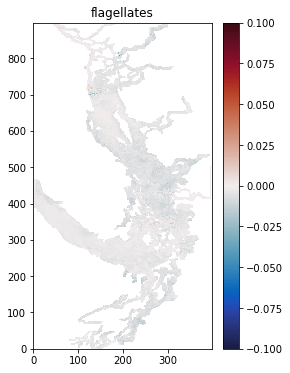

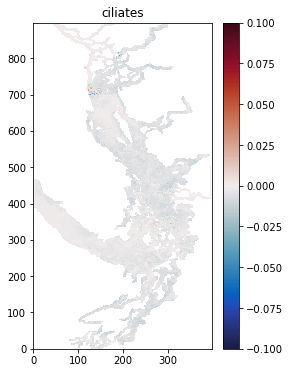

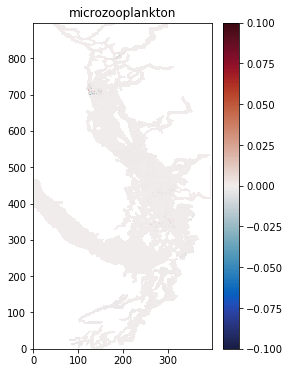

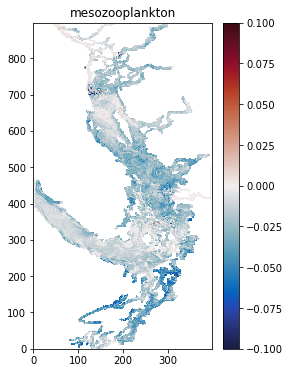

In [9]:
for var in ('nitrate', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'mesozooplankton'):
    fig,ax=plt.subplots(figsize=(4,6))
    m=ax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fHC.variables[var][23,0,:,:]-fL.variables[var][23,0,:,:]),cmap=cmocean.cm.balance,vmin=-.1,vmax=.1)
    fig.colorbar(m,ax=ax)
    ax.set_title(var)